# Glass Identification Data Set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions      # package to plot the decision boundary
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

In [ ]:
df = pd.read_csv("/content/trainKNN.txt",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


Attribute Information:

0. Id number: 1 to 214
1. RI: refractive index
2. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type of glass: (class attribute)
- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (none in this database)
- 5 containers
- 6 tableware
- 7 headlamps

In [ ]:
#renaming column labels
cols  =["Id number","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"]
df.columns = cols

In [ ]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


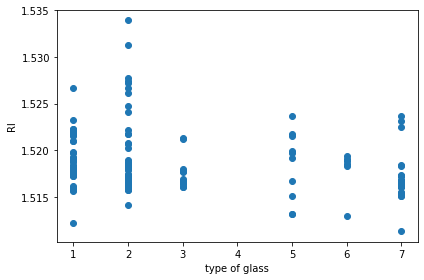

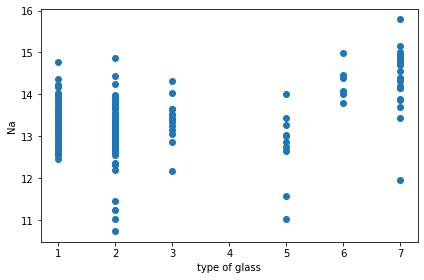

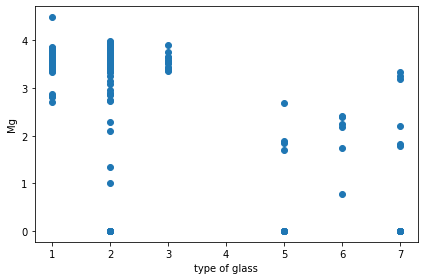

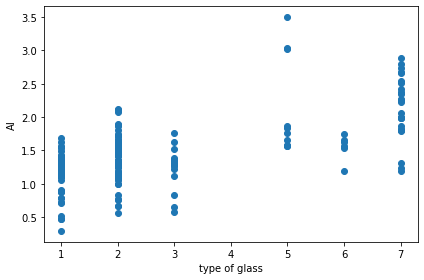

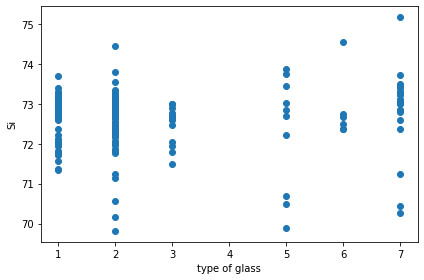

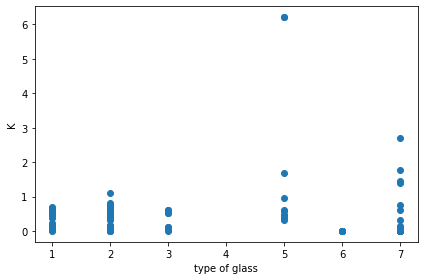

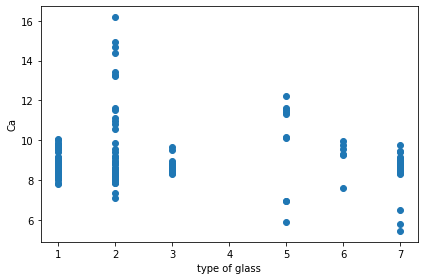

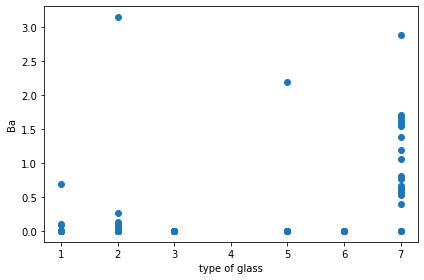

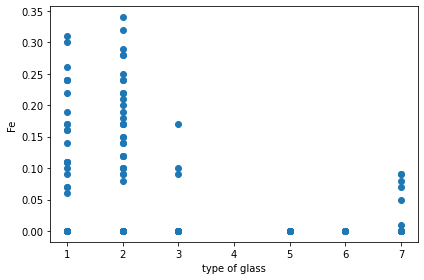

In [ ]:
#EDA
for i in range(1,10):
  plt.scatter(df["Type of glass"],df[df.columns[i]],marker='o')
  plt.xlabel("type of glass")
  plt.ylabel(df.columns[i])
 
  plt.tight_layout()
  plt.show()

In [ ]:
def knn_eucledian(data, k): 
  
  X = data[["RI",	"Na", "Mg","Al" ,"Si",	"K",	"Ca",	"Ba",	"Fe"]].values 
  y = data['Type of glass'].values 

  #splitting
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

  #scaling/standardising 
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  #modelling
  clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski' , p=2)  # p=2 is eucledian distance
  clf.fit(X_train, y_train) 

  #prediction
  y_pred = clf.predict(X_test)
  
  #metric
  print("K: ", k, " Train Accuracy: ", clf.score(X_test,y_test), " Val Accuracy: ", np.mean(cross_val_score(clf,X_test,y_test, cv=5)))


In [ ]:
#finding best k value:
for i in [1,2,3,4,5,6,7,8,9,10]:
  knn_eucledian(df, i)

K:  1  Train Accuracy:  0.725  Val Accuracy:  0.65
K:  2  Train Accuracy:  0.825  Val Accuracy:  0.6
K:  3  Train Accuracy:  0.725  Val Accuracy:  0.55
K:  4  Train Accuracy:  0.75  Val Accuracy:  0.625
K:  5  Train Accuracy:  0.65  Val Accuracy:  0.525
K:  6  Train Accuracy:  0.625  Val Accuracy:  0.5
K:  7  Train Accuracy:  0.6  Val Accuracy:  0.55
K:  8  Train Accuracy:  0.6  Val Accuracy:  0.5
K:  9  Train Accuracy:  0.575  Val Accuracy:  0.55
K:  10  Train Accuracy:  0.6  Val Accuracy:  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

In [ ]:
# applying best k value for knn using eucledian distance:

from sklearn.metrics import classification_report, accuracy_score

X = df[["RI",	"Na", "Mg","Al" ,"Si",	"K",	"Ca",	"Ba",	"Fe"]].values 
y = df['Type of glass'].values 

#splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

#scaling/standardising 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
  
#modelling
clf = KNeighborsClassifier(n_neighbors=1, metric='minkowski' , p=2)  # p=2 is eucledian distance
clf.fit(X_train, y_train) 

#prediction
y_pred = clf.predict(X_test)

#metric
ac = accuracy_score(y_test,y_pred)
print("accuracy score : ",ac)

target_names = ["RI","Na",	"Mg",	"Al",	"Si",	"K",	"Ca",	"Ba",	"Fe"]
print("classification report: ","\n",classification_report(y_test, y_pred))

accuracy score :  0.725
classification report:  
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.64      0.64      0.64        14
           3       0.50      0.50      0.50         2
           5       0.67      1.00      0.80         2
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         6

    accuracy                           0.73        40
   macro avg       0.76      0.69      0.70        40
weighted avg       0.75      0.72      0.72        40



In [ ]:
def knn_manhattan(data, k): 
  
  X = data[["RI",	"Na", "Mg","Al" ,"Si",	"K",	"Ca",	"Ba",	"Fe"]].values 
  y = data['Type of glass'].values 

  #splitting
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

  #scaling/standardising 
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  #modelling
  clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski' , p=1)  # p=1: manhattan distance
  clf.fit(X_train, y_train) 

  #prediction
  y_pred = clf.predict(X_test)
  
  #metric
  print("K: ", k, " Train Accuracy: ", clf.score(X_test,y_test), " Val Accuracy: ", np.mean(cross_val_score(clf,X_test,y_test, cv=5)))

In [ ]:
# finding best k value:
for i in [1,2,3,4,5,6,7,8,9,10,20]:
  knn_manhattan(df, i)

K:  1  Train Accuracy:  0.725  Val Accuracy:  0.725
K:  2  Train Accuracy:  0.75  Val Accuracy:  0.625


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


K:  3  Train Accuracy:  0.75  Val Accuracy:  0.575
K:  4  Train Accuracy:  0.725  Val Accuracy:  0.525
K:  5  Train Accuracy:  0.675  Val Accuracy:  0.525
K:  6  Train Accuracy:  0.675  Val Accuracy:  0.475
K:  7  Train Accuracy:  0.625  Val Accuracy:  0.525
K:  8  Train Accuracy:  0.675  Val Accuracy:  0.475
K:  9  Train Accuracy:  0.65  Val Accuracy:  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


K:  10  Train Accuracy:  0.625  Val Accuracy:  0.45
K:  20  Train Accuracy:  0.625  Val Accuracy:  0.35


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
# applying best k value for knn using manhattan distance:

from sklearn.metrics import classification_report, accuracy_score

X = df[["RI",	"Na", "Mg","Al" ,"Si",	"K",	"Ca",	"Ba",	"Fe"]].values 
y = df['Type of glass'].values 

#splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

#scaling/standardising 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
  
#modelling
clf = KNeighborsClassifier(n_neighbors=1, metric='minkowski' , p=1)  # p=1: manhattan distance
clf.fit(X_train, y_train) 

#prediction
y_pred = clf.predict(X_test)

#evaluation metric
ac = accuracy_score(y_test,y_pred)
print("accuracy score : ",ac)

print("classification report: ","\n",classification_report(y_test, y_pred))

accuracy score :  0.725
classification report:  
               precision    recall  f1-score   support

           1       0.68      0.93      0.79        14
           2       0.89      0.57      0.70        14
           3       0.25      0.50      0.33         2
           5       0.67      1.00      0.80         2
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         6

    accuracy                           0.73        40
   macro avg       0.75      0.69      0.68        40
weighted avg       0.80      0.72      0.73        40



Interpretation of the result:
  * using Eucledian distance, accuracy = 0.73
  * using Manhattan distance, accuracy = 0.73
* hence, both the distances gives almost similar result